# Week 7: Advanced Linear Regression Techniques

Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression. It is a supervised technique.

In week 7, we've covered various types of Regression:
* **Simple Linear Regression**
* **Polynomial Regression**
* **Decision Tree Regression**
* **Random Forest Regression**

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

### Initializing Packages and Importing Data

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

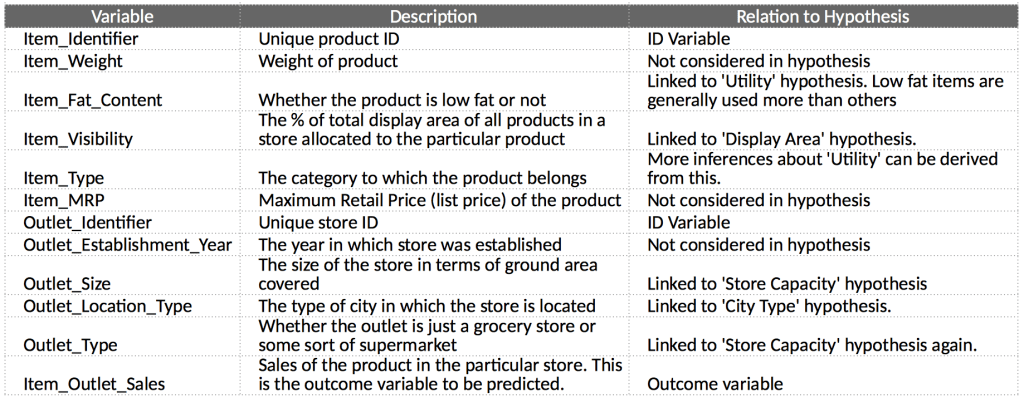

In [9]:
from google.colab import files
uploaded = files.upload()

Saving bigmart_data.csv to bigmart_data.csv


In [17]:
df=pd.read_csv("bigmart_data.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploratory Data Analysis (EDA)
1. Univariate Distribution (Numerical and Categorical Variables)
2. Bivariate Distribution
3. Correlation Analysis


In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Data Preprocessing

Look for missing values

In [12]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Impute missing values

In [13]:
df_filled = df.fillna(0)

Feature engineering -- examine each column, perform necessary steps to prepare your data before modeling

In [14]:
df.info()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,0
Item_Identifier,1559
Item_Weight,415
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


Encode categorical variables (dummy variables)

In [26]:
# Get dummy variables for categorical features, and handle missing values
df_encoded = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], dummy_na=False)

# Fill missing 'Item_Weight' with the mean
df_encoded['Item_Weight'] = df_encoded['Item_Weight'].fillna(df_encoded['Item_Weight'].mean())

# Since missing Outlet_Size was imputed with 0, let's fill with a more appropriate value like the mode if needed,
# but based on the output of isnull().sum(), Outlet_Size and Item_Weight are the only columns with missing values.
# Since we used get_dummies for Outlet_Size, NaN values will be handled by dummy_na=False.

# Display the first 5 rows of the processed dataframe
display(df_encoded.head())

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,False,False,True,...,False,True,False,False,False,True,False,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,False,True,False,...,False,True,False,True,False,False,False,True,False,False
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,False,False,True,...,False,False,False,False,False,True,True,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,False,True,False,...,True,False,False,False,False,True,False,True,False,False


### Modeling

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [22]:
from sklearn.model_selection import train_test_split
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6392, 11) (6392,)
Testing set shape: (2131, 11) (2131,)


Define target and predictors (Drop `Item_Identifier` and `Outlet_Identifier`)

In [23]:
# Drop identifiers and target
X = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# Define target
y = df['Item_Outlet_Sales']

print("Predictor shape:", X.shape)
print("Target shape:", y.shape)


Predictor shape: (8523, 10)
Target shape: (8523,)


#### Linear Regression

Fit a linear model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define target and predictors using the encoded dataframe
y = df_encoded['Item_Outlet_Sales']
# Drop the original categorical columns and the target variable
X = df_encoded.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)


# Split to training set and testing set (Note: test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

Look at estimated intercept and coefficients

In [30]:
# Intercept
print("Intercept:", linreg.intercept_)

# Coefficients with feature names
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linreg.coef_
})

print(coefficients.sort_values(by="Coefficient", ascending=False))

Intercept: -56936.57008309762
                            Feature  Coefficient
34    Outlet_Type_Supermarket Type3  1985.743186
25                 Outlet_Size_High   771.432785
21                Item_Type_Seafood   308.208886
26               Outlet_Size_Medium   190.838972
27                Outlet_Size_Small   137.215581
28      Outlet_Location_Type_Tier 1   105.054393
6          Item_Fat_Content_Regular    59.519729
7          Item_Fat_Content_low fat    57.277190
29      Outlet_Location_Type_Tier 2    52.606363
24          Item_Type_Starchy Foods    28.849622
3         Outlet_Establishment_Year    28.448501
15  Item_Type_Fruits and Vegetables    27.193595
11              Item_Type_Breakfast    26.983524
2                          Item_MRP    15.715542
17     Item_Type_Health and Hygiene     8.264246
12                 Item_Type_Canned     8.079370
0                       Item_Weight    -2.018351
5          Item_Fat_Content_Low Fat    -4.863129
16            Item_Type_Hard Drinks    

Make predictions on test dataset and plot the true outcome compared to the predicted outcome

In [32]:
y_pred = linreg.predict(X_test)

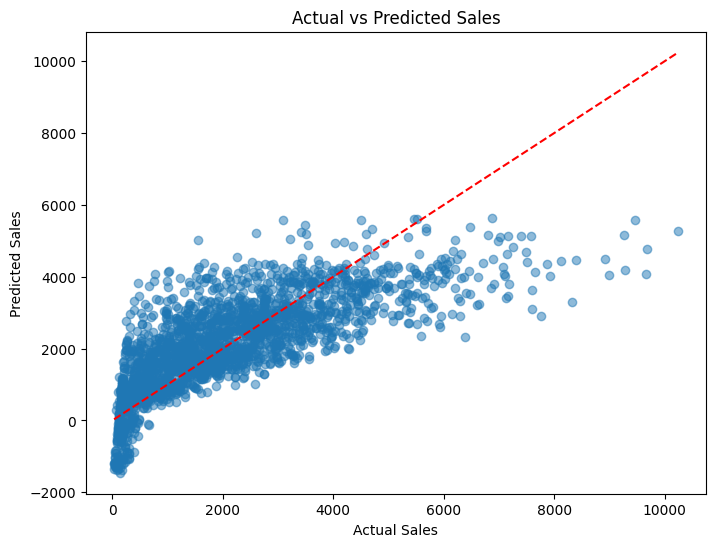

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")  # ideal line
plt.show()


Calculate the residual sum of squares and mean squared error

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

residuals = y_test - y_pred
RSS = np.sum(residuals**2)

MSE = mean_squared_error(y_test, y_pred)

print(RSS,MSE)


2545901037.3769007 1194697.8120022998


We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 5-fold)

In [35]:
from sklearn.model_selection import KFold, cross_validate

linreg = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    linreg, X, y,
    cv=cv,
    scoring={'r2': 'r2', 'mse': 'neg_mean_squared_error'},
    return_train_score=False
)

r2_scores  = scores['test_r2']
mse_scores = -scores['test_mse']
rmse_scores = np.sqrt(mse_scores)

print("R² (mean ± std):  {:.4f} ± {:.4f}".format(r2_scores.mean(), r2_scores.std()))
print("RMSE (mean ± std): {:.2f} ± {:.2f}".format(rmse_scores.mean(), rmse_scores.std()))
print("Per-fold RMSE:     ", np.round(rmse_scores, 2))


R² (mean ± std):  0.5598 ± 0.0128
RMSE (mean ± std): 1131.38 ± 36.85
Per-fold RMSE:      [1069.52 1127.84 1121.37 1167.41 1170.74]


Plot coefficient graph

#### Advanced Linear Regression Techniques

##### Ridge & LASSO Regression

If you look at the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

In [51]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

alphas = np.logspace(-4, 4, 81)
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

print(ridge_cv.alpha_)
print(ridge_cv.intercept_)

coef_ser = pd.Series(ridge_cv.coef_, index=X_train.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print(coef_ser.head(15))

y_pred_ridge = ridge_cv.predict(X_test)


1.9952623149688788
-37982.705166802596
Outlet_Type_Supermarket Type3    1816.878742
Outlet_Type_Grocery Store       -1565.190547
Outlet_Size_High                  539.970879
Item_Visibility                  -381.800862
Outlet_Type_Supermarket Type2    -337.636355
Item_Type_Seafood                 293.277742
Outlet_Size_Medium                216.069312
Outlet_Size_Small                 137.489769
Item_Type_Dairy                  -125.163214
Outlet_Location_Type_Tier 3       -90.227588
Outlet_Type_Supermarket Type1      85.948160
Item_Fat_Content_LF               -63.908769
Item_Fat_Content_Regular           59.179955
Item_Type_Soft Drinks             -56.627762
Item_Fat_Content_low fat           56.505328
dtype: float64


Calculate the residual sum of squares and mean squared error and plot coefficient graph

In [49]:
r2   = r2_score(y_test, y_pred_ridge)
mae  = mean_absolute_error(y_test, y_pred_ridge)
mse  = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)

print(f"Test R²:  {r2:.4f}")
print(f"MAE:      {mae:.2f}")
print(f"MSE:      {mse:.2f}")
print(f"RMSE:     {rmse:.2f}")

Test R²:  0.5668
MAE:      804.35
MSE:      1195143.67
RMSE:     1093.23


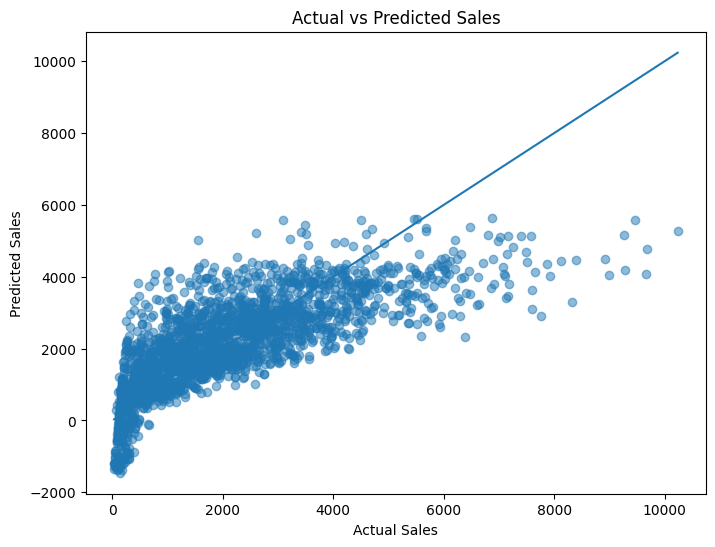

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()

There are so many predictors in the regression model. Can you use a lasso model to apply feature selection?

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


categorical_cols = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
numeric_cols     = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Include imputation within the pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with the mean
    ('scaler',  StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])

pre = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
])

lasso = LassoCV(alphas=np.logspace(-4, 2, 60), cv=5, max_iter=10000, n_jobs=-1, random_state=42)

pipe_lasso = Pipeline([
    ('pre', pre),
    ('lasso', lasso)
])

# Split data *after* defining the pipeline and before fitting
X = df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

pipe_lasso.fit(X_train, y_train)
y_pred = pipe_lasso.predict(X_test)

r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best alpha:", pipe_lasso.named_steps['lasso'].alpha_)
print(f"Test R²:  {r2:.4f}")
print(f"MAE:      {mae:.2f}")
print(f"RMSE:     {rmse:.2f}")

feat_names = pipe_lasso.named_steps['pre'].get_feature_names_out()
coefs = pipe_lasso.named_steps['lasso'].coef_

selected_mask = ~np.isclose(coefs, 0.0, atol=1e-8)
selected_features = pd.DataFrame({
    'feature': feat_names[selected_mask],
    'coef':    coefs[selected_mask]
}).sort_values(by='coef', key=lambda s: s.abs(), ascending=False)

print(f"Selected {selected_mask.sum()} of {len(feat_names)} features")
print(selected_features.head(20))

Best alpha: 3.7693909753883634
Test R²:  0.5677
MAE:      803.29
RMSE:     1092.12
Selected 11 of 35 features
                                 feature         coef
8         cat__Outlet_Type_Grocery Store -1926.500915
10    cat__Outlet_Type_Supermarket Type3  1360.682969
2                          num__Item_MRP   979.348559
9     cat__Outlet_Type_Supermarket Type2  -265.884624
5                   cat__Item_Type_Dairy   -59.219758
4          cat__Item_Fat_Content_Regular    52.793501
1                   num__Item_Visibility   -21.489205
6   cat__Item_Type_Fruits and Vegetables    20.154120
3         num__Outlet_Establishment_Year    -4.549181
0                       num__Item_Weight    -3.712232
7                cat__Outlet_Size_Medium    -2.393807


Calculate the residual sum of squares and mean squared error and plot coefficient graph

What are some differences between ridge and lasso, when should we proceed to use each?

Lasso is best at feature selection, ridge is better than linear regressions when there is multicollinearity

##### Elastic Net and Gradient Descent

Elastic Net is a regularization technique that effectively combines L1 (Lasso) and L2 (Ridge) penalties, offering both overfitting protection and feature selection capabilities, making it suitable for handling complex datasets.

Fit an Elastic Net Model

In [58]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

categorical_cols = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
numeric_cols     = [c for c in X.columns if c not in categorical_cols]

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])

pre = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
])

# 3) Elastic Net with CV
enet = ElasticNetCV(
    alphas=np.logspace(-4, 2, 60),
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
    cv=5,
    max_iter=100000,
    n_jobs=-1,
    random_state=42
)

pipe_enet = Pipeline([
    ('pre',   pre),
    ('enet',  enet)
])

pipe_enet.fit(X_train, y_train)
y_pred = pipe_enet.predict(X_test)

r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)

print("Best alpha:    ", pipe_enet.named_steps['enet'].alpha_)
print("Best l1_ratio: ", pipe_enet.named_steps['enet'].l1_ratio_)
print(f"Test R²: {r2:.4f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

feat_names = pipe_enet.named_steps['pre'].get_feature_names_out()
coefs = pipe_enet.named_steps['enet'].coef_

selected_mask = ~np.isclose(coefs, 0.0, atol=1e-10)
selected = pd.DataFrame({'feature': feat_names, 'coef': coefs}) \
            .loc[selected_mask] \
            .sort_values(by='coef', key=lambda s: s.abs(), ascending=False)

print(f"Selected {selected_mask.sum()} of {len(feat_names)} features")
print(selected.head(20))


Best alpha:     0.0020991037201085546
Best l1_ratio:  0.9
Test R²: 0.5668 | RMSE: 1093.23 | MAE: 803.98
Selected 35 of 35 features
                               feature         coef
34  cat__Outlet_Type_Supermarket Type3  2055.814659
31      cat__Outlet_Type_Grocery Store -1660.450317
2                        num__Item_MRP   983.979695
25               cat__Outlet_Size_High   445.705114
33  cat__Outlet_Type_Supermarket Type2  -315.750364
21              cat__Item_Type_Seafood   299.796834
26             cat__Outlet_Size_Medium  -246.849267
3       num__Outlet_Establishment_Year   234.448366
27              cat__Outlet_Size_Small  -189.545210
30    cat__Outlet_Location_Type_Tier 3  -167.245473
28    cat__Outlet_Location_Type_Tier 1   158.293497
13                cat__Item_Type_Dairy  -123.623935
4             cat__Item_Fat_Content_LF   -62.659136
32  cat__Outlet_Type_Supermarket Type1   -61.731646
6        cat__Item_Fat_Content_Regular    60.748679
7        cat__Item_Fat_Content_low fa

Elastic Net can be computationally expensive, especially for large datasets, but one way to achieve Elastic Net in a more scalable and efficient manner is to use Stochastic Gradient Descent (SGD), which updates the model parameters iteratively.

Fit an SGDRegressor Model using 'elasticnet' for the loss function

###Additional Resources
https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

https://towardsdatascience.com/from-linear-regression-to-ridge-regression-the-lasso-and-the-elastic-net-4eaecaf5f7e6/

## Submission

Commit your completed **Week9_regression.ipynb** notebook to your personal Github repo you shared with the faculty.